In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/My\ Drive/path/to/version_folder

ls: cannot access '/content/drive/My Drive/path/to/version_folder': No such file or directory


In [4]:
# Load the train-test split data
X_train, X_test, y_train, y_test = joblib.load('/content/drive/MyDrive/train_test_split.joblib')

In [5]:
# params = {
#     "n_estimators": 50,
#     "max_depth": 5,
#     "min_samples_split": 10,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
# }

In [6]:
# params = {
#     "n_estimators": 200,         # Increase for more boosting stages
#     "max_depth": 50,               # Slightly increase to allow more complex interactions
#     "min_samples_split": 7,       # Decrease to allow finer splits
#     "min_samples_leaf":10,       # Small value to prevent overfitting on small samples
#     "learning_rate": 0.05,        # Slightly higher learning rate for faster convergence
#     "subsample": 0.8,             # Use subset of data per boosting stage for generalization
#     "loss": "squared_error",      # Keep the loss function as squared error
# }

In [7]:
# params = {
#     "n_estimators": 200,            # Increase to allow more boosting stages for gradual learning
#     "max_depth": 3,                 # Reduce depth to prevent complex, overfitting trees
#     "min_samples_split": 20,        # Increase to make the model more conservative with splits
#     "min_samples_leaf": 5,          # Ensure leaves are larger to reduce overfitting
#     "learning_rate": 0.005,         # Lower learning rate for more stability during training
#     "loss": "squared_error",        # Keep loss function as squared error for RMSE optimization
#     "subsample": 0.8,               # Use 80% of data for each boosting stage to add regularization
#     "max_features": "sqrt",         # Randomly select a subset of features to reduce variance
# }

In [11]:
params = {
                                "n_estimators":200,  # Number of boosting stages
                                "max_depth":3,      # Depth of each tree
                                  "learning_rate":0.01, # Learning rate for model updates

          }

In [12]:
model = GradientBoostingRegressor(**params)


model.fit(X_train, y_train)




GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)

In [13]:

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=10, scoring='r2', cv=5, random_state=42)

In [14]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R² Score: {r2}")

R² Score: 0.23371073585675306


In [15]:
# Save the plot with a timestamp in the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")  # Format: YYYYMMDD_HHMMSS
directory = r"C:\Users\Maryl\OneDrive\Allstate AI\Graphs"
version_folder = os.path.join(directory, f'Gradient_Boosting_Machine_{timestamp}')
os.makedirs(version_folder)
file_path= os.path.join(version_folder, '{}_Gradient_Boosting_Machine'.format(timestamp))

# savetime = datetime.now().strftime("%Y%m%d%H%M")
# #joblib.dump(youden_index, 'ML Prediction Results/{}_youden_index-v2.pkl'.format(savetime))
# directory = 'ML Prediction Results'
# version_folder = os.path.join(directory, f'SVM_Version_{savetime}')
# os.makedirs(version_folder)
# file_path = os.path.join(version_folder, '{}_youden_index-v2.pkl'.format(savetime))
# joblib.dump(youden_index,file_path)


# plt.savefig(f'predicted_vs_actual_{timestamp}.png')  # Save as PNG
# #plot is not saving, figure out why

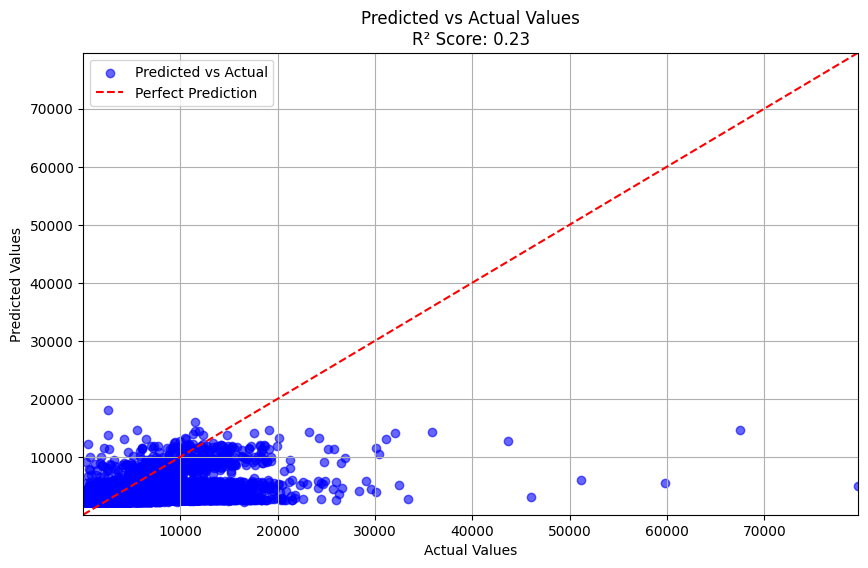

In [16]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')  # Diagonal line
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual Values\nR² Score: {r2:.2f}')
plt.legend()
plt.grid()
plt.savefig(os.path.join(version_folder, '{}_R2_graph.png'.format(timestamp)), transparent = False, dpi = 650, bbox_inches = "tight")


In [17]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
plt.show()

Mean Squared Error: 6252613.705302435
R² Score: 0.23371073585675306


RMSE: 2500.522686420268


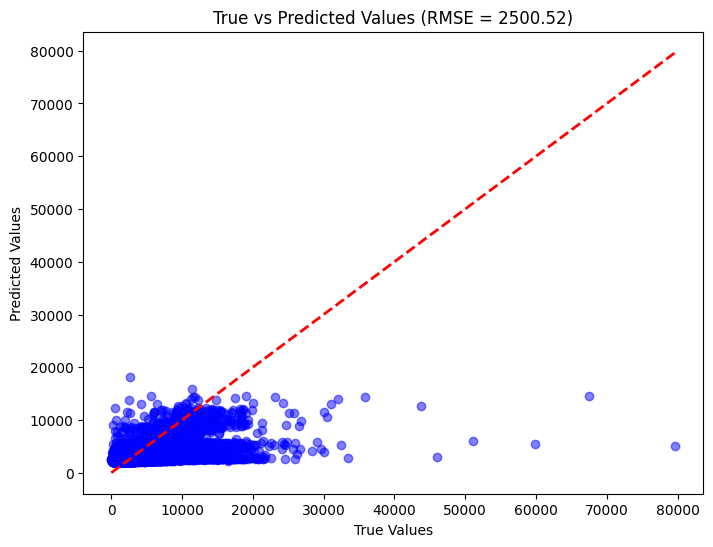

In [18]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Scatter plot for True vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values (RMSE = {rmse:.2f})")
plt.savefig(os.path.join(version_folder, '{}_RMSE_plot.png'.format(timestamp)),transparent = False, dpi = 650, bbox_inches = "tight")
# plt.savefig(os.path.join(version_folder, '{}_predicted_vs_actual.png'.format(savetime)),
# plt.savefig(f'predicted_vs_actual_{timestamp}.png', bbox_inches='tight')

plt.show()

Residual Value (preicted value - the actal value): 10168      984.532399
6936      1568.510425
39511    -2883.034916
40087       66.501834
117312    1016.149674
             ...     
56217      847.675807
162470    1466.391769
114899    2211.867406
127308   -2456.279125
35726     1043.360323
Name: loss, Length: 37664, dtype: float64


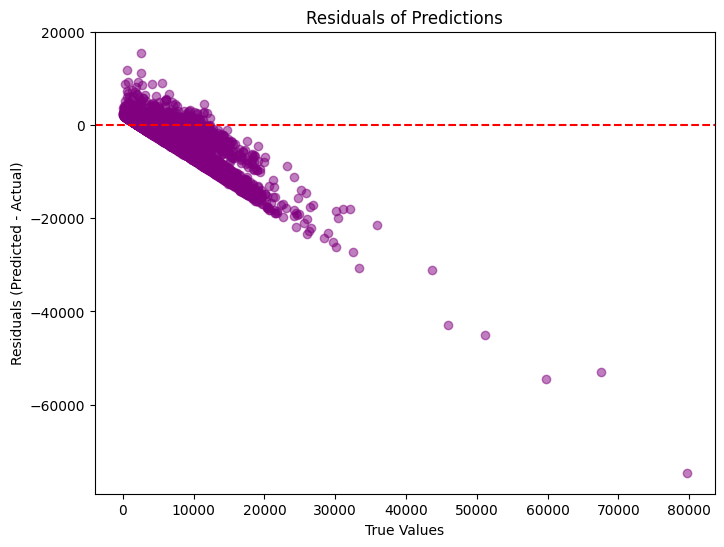

In [19]:
# Calculate residuals
residual = y_pred - y_test
print(f"Residual Value (preicted value - the actal value): {residual}")


# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residual, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals (Predicted - Actual)")
plt.title("Residuals of Predictions")
plt.savefig(os.path.join(version_folder, '{}_residuals_plot_'.format(timestamp)), transparent = False, dpi = 650, bbox_inches = "tight")
# plt.savefig(f'residuals_plot_{timestamp}.png', bbox_inches='tight')
plt.show()